In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

In [2]:
imdb = keras.datasets.imdb

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences...')
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences...
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [10]:
model = keras.Sequential()
model.add(keras.layers.Embedding(max_features, 128, input_length=max_len))
model.add(keras.layers.Conv1D(32, 7, activation=keras.activations.relu))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(32, 7, activation=keras.activations.relu))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),
              loss=keras.losses.binary_crossentropy,
              metrics=[keras.metrics.binary_accuracy])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.6944 - binary_accuracy: 0.5206 - val_loss: 0.6991 - val_binary_accuracy: 0.4990
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6814 - binary_accuracy: 0.5629 - val_loss: 0.6853 - val_binary_accuracy: 0.5552
Epoch 3/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6674 - binary_accuracy: 0.6023 - val_loss: 0.6854 - val_binary_accuracy: 0.5294
Epoch 4/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6492 - binary_accuracy: 0.6438 - val_loss: 0.6766 - val_binary_accuracy: 0.5438
Epoch 5/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6292 - binary_accuracy: 0.6748 - val_loss: 0.6429 - val_binary_accuracy: 0.6542
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6030 - binary_accuracy: 0.7029 - val_loss: 0.6377 - val_binary_ac

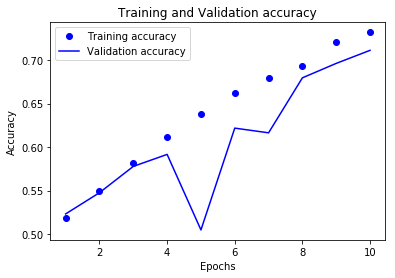

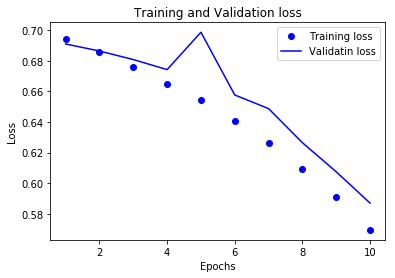

In [7]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()